Importing:

In [31]:
import json
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

In [32]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU for training.")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU for training.")

Using GPU for training.


In [33]:
%run "../DL_notebooks/src/dataloading.ipynb"
%run "../DL_notebooks/src/training.ipynb"
%run "../DL_notebooks/src/evaluate.ipynb"
%run "../DL_notebooks/src/visualizations.ipynb"
%run "../DL_notebooks/model_architectures.ipynb"

Data loaded and split into training, validation and testing datasets


Training:

In [34]:
with open('../DL_notebooks/configs/model_configs.json', 'r') as model_config_file:
    model_configs = json.load(model_config_file)

for config in model_configs:
    if config['model-architecture'] == 'AlexNet':
        epochs = config['epoch-count']
        optimizer_lr = config['optimizer-lr']

        num_classes = config['alexnet-model-hyperparameters']['num_classes']
        model = MRI_AlexNet( num_classes) 

        if config['loss-function'] == 'cross-entropy':
            criterion = nn.CrossEntropyLoss()

        if config['optimizer'] == 'adam':
            optimizer = optim.Adam(model.parameters(), lr=optimizer_lr)

        # Move the model to the device (assuming you have defined 'device' earlier)
        model = model.to(device)


In [35]:
for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
    train_loss, train_accuracy, train_labels, train_preds = train(model, train_loader=train_loader,optimizer=optimizer, criterion=criterion, device=device)
    val_loss, val_accuracy, val_labels, val_preds = evaluate(model, val_loader, criterion=criterion, device=device)

    tqdm.write(
        f"Epoch [{epoch + 1}/{epochs}] "
        f"Train Loss: {train_loss:.4f} "
        f"Train Accuracy: {train_accuracy * 100:.2f}% "
        f"Validation Loss: {val_loss:.4f} "
        f"Validation Accuracy: {val_accuracy * 100:.2f}%"
    )


Training:   5%|▌         | 1/20 [00:04<01:20,  4.26s/epoch]

Epoch [1/20] Train Loss: 1.3544 Train Accuracy: 30.48% Validation Loss: 1.3629 Validation Accuracy: 28.27%


Training:  10%|█         | 2/20 [00:08<01:15,  4.19s/epoch]

Epoch [2/20] Train Loss: 1.3056 Train Accuracy: 34.95% Validation Loss: 1.2833 Validation Accuracy: 37.80%


Training:  15%|█▌        | 3/20 [00:12<01:10,  4.16s/epoch]

Epoch [3/20] Train Loss: 1.1830 Train Accuracy: 43.30% Validation Loss: 1.2404 Validation Accuracy: 42.33%


Training:  20%|██        | 4/20 [00:16<01:06,  4.15s/epoch]

Epoch [4/20] Train Loss: 1.1252 Train Accuracy: 47.87% Validation Loss: 1.0752 Validation Accuracy: 49.76%


Training:  25%|██▌       | 5/20 [00:20<01:01,  4.13s/epoch]

Epoch [5/20] Train Loss: 0.9898 Train Accuracy: 56.65% Validation Loss: 1.1155 Validation Accuracy: 49.27%


Training:  30%|███       | 6/20 [00:24<00:57,  4.11s/epoch]

Epoch [6/20] Train Loss: 0.9132 Train Accuracy: 62.20% Validation Loss: 0.8697 Validation Accuracy: 61.71%


Training:  35%|███▌      | 7/20 [00:28<00:53,  4.09s/epoch]

Epoch [7/20] Train Loss: 0.8455 Train Accuracy: 64.84% Validation Loss: 0.7848 Validation Accuracy: 67.21%


Training:  40%|████      | 8/20 [00:32<00:49,  4.09s/epoch]

Epoch [8/20] Train Loss: 0.6911 Train Accuracy: 71.24% Validation Loss: 0.7315 Validation Accuracy: 68.98%


Training:  45%|████▌     | 9/20 [00:37<00:44,  4.08s/epoch]

Epoch [9/20] Train Loss: 0.7288 Train Accuracy: 71.51% Validation Loss: 0.7508 Validation Accuracy: 69.14%


Training:  50%|█████     | 10/20 [00:41<00:40,  4.09s/epoch]

Epoch [10/20] Train Loss: 0.6501 Train Accuracy: 76.63% Validation Loss: 0.6582 Validation Accuracy: 73.83%


Training:  55%|█████▌    | 11/20 [00:45<00:36,  4.08s/epoch]

Epoch [11/20] Train Loss: 0.5476 Train Accuracy: 79.05% Validation Loss: 0.6133 Validation Accuracy: 76.41%


Training:  60%|██████    | 12/20 [00:49<00:32,  4.07s/epoch]

Epoch [12/20] Train Loss: 0.4328 Train Accuracy: 83.09% Validation Loss: 0.6066 Validation Accuracy: 75.77%


Training:  65%|██████▌   | 13/20 [00:53<00:28,  4.05s/epoch]

Epoch [13/20] Train Loss: 0.3979 Train Accuracy: 83.90% Validation Loss: 0.5476 Validation Accuracy: 80.29%


Training:  70%|███████   | 14/20 [00:57<00:24,  4.01s/epoch]

Epoch [14/20] Train Loss: 0.3716 Train Accuracy: 84.76% Validation Loss: 0.6322 Validation Accuracy: 75.77%


Training:  75%|███████▌  | 15/20 [01:01<00:19,  3.99s/epoch]

Epoch [15/20] Train Loss: 0.3166 Train Accuracy: 87.78% Validation Loss: 0.5808 Validation Accuracy: 79.48%


Training:  80%|████████  | 16/20 [01:05<00:15,  3.98s/epoch]

Epoch [16/20] Train Loss: 0.2896 Train Accuracy: 88.64% Validation Loss: 0.5357 Validation Accuracy: 83.36%


Training:  85%|████████▌ | 17/20 [01:08<00:11,  3.96s/epoch]

Epoch [17/20] Train Loss: 0.2128 Train Accuracy: 91.76% Validation Loss: 0.4903 Validation Accuracy: 83.04%


Training:  90%|█████████ | 18/20 [01:12<00:07,  3.97s/epoch]

Epoch [18/20] Train Loss: 0.1938 Train Accuracy: 92.57% Validation Loss: 0.5733 Validation Accuracy: 81.74%


Training:  95%|█████████▌| 19/20 [01:16<00:03,  3.98s/epoch]

Epoch [19/20] Train Loss: 0.1537 Train Accuracy: 94.56% Validation Loss: 0.4729 Validation Accuracy: 86.11%


Training: 100%|██████████| 20/20 [01:21<00:00,  4.06s/epoch]

Epoch [20/20] Train Loss: 0.1285 Train Accuracy: 94.88% Validation Loss: 0.5231 Validation Accuracy: 84.49%


In [36]:
test_losses = []
test_accuracies = []
for epoch in tqdm(range(epochs), desc="Testing", unit="epoch"):
    start_time = time.time()
    test_loss, test_accuracy, test_labels, test_preds = evaluate(model, test_loader, criterion=criterion, device=device)
    end_time = time.time()

    epoch_time = end_time - start_time

    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    tqdm.write(
        f"Testing Epoch [{epoch + 1}/{epochs}] "
        f"Test Loss: {test_loss:.4f} "
        f"Test Accuracy: {test_accuracy * 100:.2f}% "
        f"Time per Epoch: {epoch_time:.2f} seconds"
    )

avg_test_loss = sum(test_losses) / len(test_losses)
avg_test_accuracy = sum(test_accuracies) / len(test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}")
print(f"Average Test Accuracy: {avg_test_accuracy * 100:.2f}%")

Testing:   5%|▌         | 1/20 [00:00<00:12,  1.53epoch/s]

Testing Epoch [1/20] Test Loss: 0.4626 Test Accuracy: 87.42% Time per Epoch: 0.65 seconds


Testing:  10%|█         | 2/20 [00:01<00:12,  1.50epoch/s]

Testing Epoch [2/20] Test Loss: 0.4365 Test Accuracy: 87.42% Time per Epoch: 0.68 seconds


Testing:  15%|█▌        | 3/20 [00:02<00:11,  1.42epoch/s]

Testing Epoch [3/20] Test Loss: 0.4315 Test Accuracy: 87.42% Time per Epoch: 0.74 seconds


Testing:  20%|██        | 4/20 [00:02<00:11,  1.40epoch/s]

Testing Epoch [4/20] Test Loss: 0.4397 Test Accuracy: 87.42% Time per Epoch: 0.73 seconds


Testing:  25%|██▌       | 5/20 [00:03<00:10,  1.38epoch/s]

Testing Epoch [5/20] Test Loss: 0.4576 Test Accuracy: 87.42% Time per Epoch: 0.74 seconds


Testing:  30%|███       | 6/20 [00:04<00:10,  1.36epoch/s]

Testing Epoch [6/20] Test Loss: 0.4272 Test Accuracy: 87.42% Time per Epoch: 0.76 seconds


Testing:  35%|███▌      | 7/20 [00:05<00:09,  1.33epoch/s]

Testing Epoch [7/20] Test Loss: 0.4280 Test Accuracy: 87.42% Time per Epoch: 0.79 seconds


Testing:  40%|████      | 8/20 [00:05<00:09,  1.31epoch/s]

Testing Epoch [8/20] Test Loss: 0.4575 Test Accuracy: 87.42% Time per Epoch: 0.78 seconds


Testing:  45%|████▌     | 9/20 [00:06<00:08,  1.30epoch/s]

Testing Epoch [9/20] Test Loss: 0.4287 Test Accuracy: 87.42% Time per Epoch: 0.78 seconds


Testing:  50%|█████     | 10/20 [00:07<00:07,  1.29epoch/s]

Testing Epoch [10/20] Test Loss: 0.4455 Test Accuracy: 87.42% Time per Epoch: 0.79 seconds


Testing:  55%|█████▌    | 11/20 [00:08<00:07,  1.28epoch/s]

Testing Epoch [11/20] Test Loss: 0.4347 Test Accuracy: 87.42% Time per Epoch: 0.80 seconds


Testing:  60%|██████    | 12/20 [00:09<00:06,  1.27epoch/s]

Testing Epoch [12/20] Test Loss: 0.4376 Test Accuracy: 87.42% Time per Epoch: 0.80 seconds


Testing:  65%|██████▌   | 13/20 [00:09<00:05,  1.25epoch/s]

Testing Epoch [13/20] Test Loss: 0.4528 Test Accuracy: 87.42% Time per Epoch: 0.83 seconds


Testing:  70%|███████   | 14/20 [00:10<00:04,  1.24epoch/s]

Testing Epoch [14/20] Test Loss: 0.4423 Test Accuracy: 87.42% Time per Epoch: 0.81 seconds


Testing:  75%|███████▌  | 15/20 [00:11<00:04,  1.24epoch/s]

Testing Epoch [15/20] Test Loss: 0.4314 Test Accuracy: 87.42% Time per Epoch: 0.82 seconds


Testing:  80%|████████  | 16/20 [00:12<00:03,  1.23epoch/s]

Testing Epoch [16/20] Test Loss: 0.4281 Test Accuracy: 87.42% Time per Epoch: 0.82 seconds


Testing:  85%|████████▌ | 17/20 [00:13<00:02,  1.21epoch/s]

Testing Epoch [17/20] Test Loss: 0.4273 Test Accuracy: 87.42% Time per Epoch: 0.85 seconds


Testing:  90%|█████████ | 18/20 [00:14<00:01,  1.20epoch/s]

Testing Epoch [18/20] Test Loss: 0.4390 Test Accuracy: 87.42% Time per Epoch: 0.84 seconds


Testing:  95%|█████████▌| 19/20 [00:14<00:00,  1.19epoch/s]

Testing Epoch [19/20] Test Loss: 0.4417 Test Accuracy: 87.42% Time per Epoch: 0.86 seconds


Testing: 100%|██████████| 20/20 [00:15<00:00,  1.27epoch/s]

Testing Epoch [20/20] Test Loss: 0.4286 Test Accuracy: 87.42% Time per Epoch: 0.84 seconds
Average Test Loss: 0.4389
Average Test Accuracy: 87.42%


Training Classification:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       546
           1       0.93      0.94      0.93       560
           2       0.95      0.96      0.96       254
           3       0.98      0.98      0.98       497

    accuracy                           0.95      1857
   macro avg       0.95      0.95      0.95      1857
weighted avg       0.95      0.95      0.95      1857

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       169
           1       0.87      0.67      0.75       175
           2       0.81      0.95      0.88        97
           3       0.93      0.94      0.94       178

    accuracy                           0.84       619
   macro avg       0.84      0.86      0.85       619
weighted avg       0.85      0.84      0.84       619

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       186
           1       0.

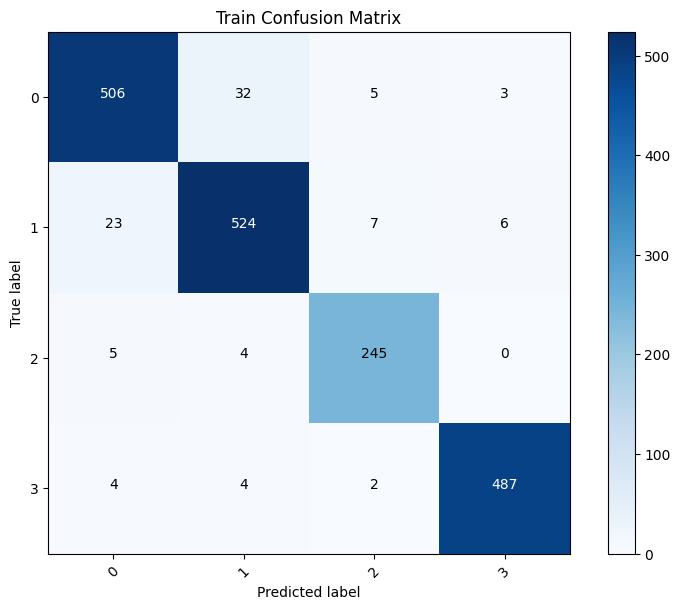

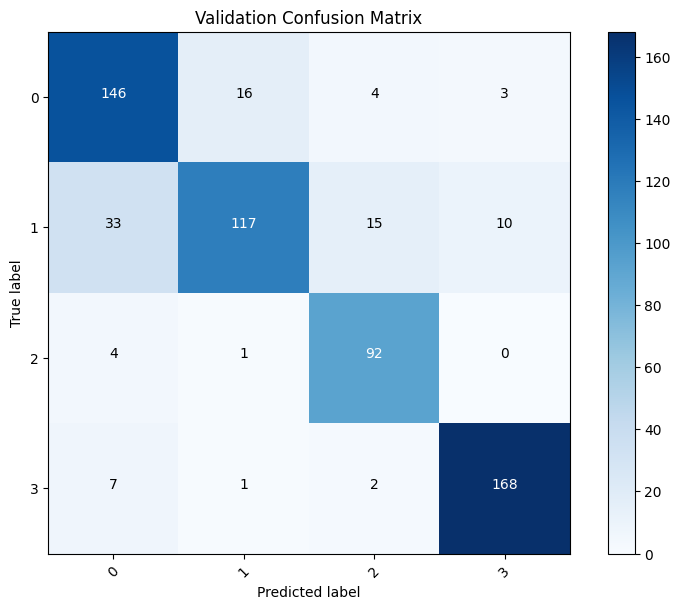

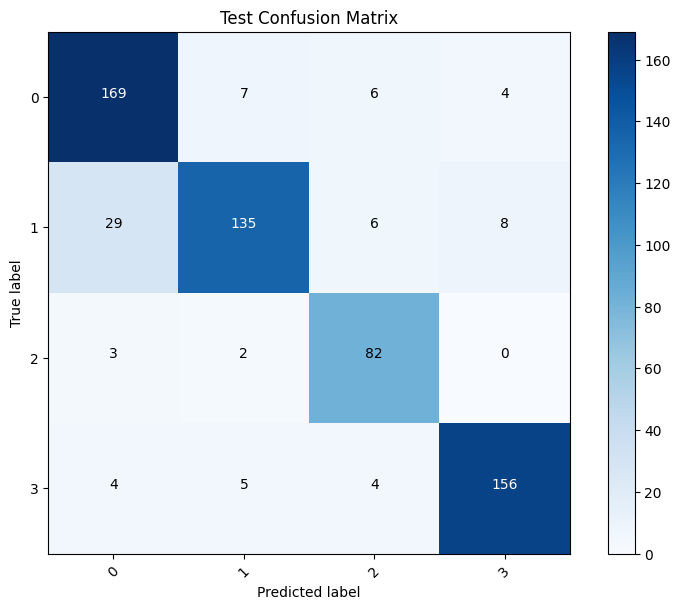

In [37]:
confusion_train = confusion_matrix(train_labels, train_preds)
confusion_val = confusion_matrix(val_labels, val_preds)
confusion_test = confusion_matrix(test_labels, test_preds)

print(classification_report(train_labels, train_preds))
print(classification_report(val_labels, val_preds))
print(classification_report(test_labels, test_preds))

class_names = [str(i) for i in range(NUM_CLASSES)] 
plot_confusion_matrix(confusion_train, class_names, title='Train Confusion Matrix')
plot_confusion_matrix(confusion_val, class_names, title='Validation Confusion Matrix')
plot_confusion_matrix(confusion_test, class_names, title='Test Confusion Matrix')

plt.show()